# **目的:**
透過LSTM與比較CNN+LSTM來分析蘋果股價

特徵：apple_stock股價2015-2024高低價、成交量、sp500成交價、VIX指數、14天RSI、CPI、蘋果季營收

# **模型:**
LTMS: 利用LSTM處理時間序列數據的能力
CNN+LSTM：先由 CNN 提取出關鍵特徵，再由 LSTM 對這些特徵進行時間序列分析。這種多層次的信息融合使得模型能夠更全面地理解數據，從而提高預測的準確性

# 資料來源:
yfinance,ta,fredapi

---


參考資料:
[獲取RSI](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html)、
[Stock Market Analysis 📈 + Prediction using LSTM](https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm)、[查詢美國歷史總體經濟數據](https://havocfuture.tw/blog/python-economy-fred)、[Fred CPI](https://fred.stlouisfed.org/series/CPIAUCSL)


# 資料收集
資料獲取，透過yfinance,ta,fredapi資料庫抓取股市資料



In [ ]:
!pip install ta
!pip install fredapi

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=8969a8c1babde7fc7f46885be707c209afe4a2d98cb047ba23b6d37c505fc815
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import yfinance as yf
import ta
from fredapi import Fred
import pandas as pd

# 蘋果的股市數據
apple_stock = yf.download('AAPL', start='2015-01-01', end='2024-08-01')
print("\nApple Stock\n")
print(apple_stock.tail())

# S&P 500指數數據
sp500 = yf.download('^GSPC', start='2015-01-01', end='2024-08-01')
print("\nsp500\n")
print(sp500.tail())

# 只需要S&P 500收盤價
sp500 = sp500['Close']
apple_stock['SP500'] = sp500

# Vix指數數據
VIX = yf.download('^VIX', start='2015-01-01', end='2024-08-01')
print("\VIX\n")
print(VIX.tail())

# 只需要Vix收盤價
VIX = VIX['Close']
apple_stock['VIX'] = VIX

# 計算14天的RSI
apple_stock['RSI'] = ta.momentum.RSIIndicator(apple_stock['Close'], window=14).rsi()

# 使用API獲取通貨膨脹率數據
fred = Fred(api_key='1a3a709193de67453cb8d93a68af1c13')
inflation_rate = fred.get_series('CPIAUCSL', start='2015-01-01', end='2024-08-01')
print("\nCPI\n")
print(inflation_rate.tail())

# 通貨膨脹率數據加到蘋果股票數據
apple_stock['CPI'] = inflation_rate


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Apple Stock

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   
2024-07-31  221.440002  223.820007  220.630005  222.080002  221.823242   

              Volume  
Date                  
2024-07-25  51391200  
2024-07-26  41601300  
2024-07-29  36311800  
2024-07-30  41643800  
2024-07-31  50036300  

sp500

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-07-25  5428.700195  5491.589844  5390.950195  5399.220215  5399.220215   
2024-07-26  5433.669922  5488.319824  5430.700195  5459.10009

[*********************100%***********************]  1 of 1 completed


\VIX

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2024-07-25  18.410000  19.360001  16.420000  18.459999  18.459999       0
2024-07-26  17.969999  18.049999  16.370001  16.389999  16.389999       0
2024-07-29  16.590000  17.209999  16.230000  16.600000  16.600000       0
2024-07-30  16.639999  18.320000  16.260000  17.690001  17.690001       0
2024-07-31  16.660000  16.770000  15.710000  16.360001  16.360001       0

CPI

2024-03-01    312.230
2024-04-01    313.207
2024-05-01    313.225
2024-06-01    313.049
2024-07-01    313.534
dtype: float64


資料檢查

In [ ]:
#資料檢查
print(apple_stock.info)
print(apple_stock.dtypes)
print(apple_stock.isnull().sum())

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   27.847500   27.860001   26.837500   27.332500   24.373962   
2015-01-05   27.072500   27.162500   26.352501   26.562500   23.687304   
2015-01-06   26.635000   26.857500   26.157499   26.565001   23.689537   
2015-01-07   26.799999   27.049999   26.674999   26.937500   24.021711   
2015-01-08   27.307501   28.037500   27.174999   27.972500   24.944681   
...                ...         ...         ...         ...         ...   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   
2024-07-31  221.440002  223.820007  220.630005  222.080002  221.823242   

     

In [ ]:
#CPI數據未能有每個月的1號有而且只到6/1
inflation_rate = inflation_rate.reindex(apple_stock.index)

# 每個月1號的CPI值填寫到其他日
cpi_filled = inflation_rate.ffill()
print(cpi_filled)

#通貨膨脹率數據加到蘋果股票數據
apple_stock['CPI'] = cpi_filled

#CPI從2015-04-01才開始有值，將apple_stock值從2015-04-01開始計算
apple_stock = apple_stock[apple_stock.index >= '2015-04-01']
print(apple_stock.head(50))

Date
2015-01-02        NaN
2015-01-05        NaN
2015-01-06        NaN
2015-01-07        NaN
2015-01-08        NaN
               ...   
2024-07-25    313.534
2024-07-26    313.534
2024-07-29    313.534
2024-07-30    313.534
2024-07-31    313.534
Length: 2410, dtype: float64
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2015-04-01  31.205000  31.280001  30.775000  31.062500  27.809534  162485600   
2015-04-02  31.257500  31.389999  31.047501  31.330000  28.049025  128880400   
2015-04-06  31.117500  31.877501  31.082500  31.837500  28.503372  148776000   
2015-04-07  31.910000  32.029999  31.495001  31.502501  28.203455  140049200   
2015-04-08  31.462500  31.600000  31.242500  31.400000  28.111692  149316800   
2015-04-09  31.462500  31.645000  31.165001  31.639999  28.326557  129936000   
2015-04-10  31.487499  31.802500  31.315001  31.775000  28.447424  160752000   
2015

In [ ]:
#資料檢查
print(apple_stock.dtypes)
print(apple_stock.isnull().sum())

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
SP500        float64
VIX          float64
RSI          float64
CPI          float64
dtype: object
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
SP500        0
VIX          0
RSI          0
CPI          0
dtype: int64


In [ ]:
# 獲取蘋果公司的財報數據

# 讀取CSV文件
df = pd.read_csv('Apple 2015-2024 revenue.csv')

# 查看數據結構
print(df.head())

# revenue去掉「B」並轉換營收數字為數值
df['revenue'] = df['revenue'].replace(['--', 'B'], [None, ''], regex=True).astype(float) * 1e9
# EPS去掉「--」並轉換營收數字為數值
df['EPS'] = df['EPS'].replace('--', None, regex=True).astype(float)

# 轉換時間格式
df['Announce Date'] = pd.to_datetime(df['Announce Date'], format='%Y年%m月%d日')
df.set_index('Announce Date', inplace=True)
print(df.head())

#把季營收給公告後的三個月
def expand_to_daily(df):
    daily_dfs = []  # 用於儲存每日數據的列表

    for date, revenue in df['revenue'].items():

      # print("date - pd.DateOffset(days=5)")
      # print(date - pd.DateOffset(days=5))
      # print("---")
      if 1 <= date.day <= 5:
        start_date = date.replace(day=1)
        # print(start_date)
        end_date = (start_date + pd.DateOffset(months=3)) - pd.DateOffset(days=1)
        # print(end_date)
      else:
        start_date = (date + pd.DateOffset(months=1)).replace(day=1)
        # print(start_date)
        end_date = (start_date + pd.DateOffset(months=3)) - pd.DateOffset(days=1)
        # print(end_date)

      # 生成公告後三個月內的所有日期
      daily_range = pd.date_range(start_date, end_date, freq='D')
      daily_data = pd.DataFrame({
          'Date': daily_range,
          'Revenue': revenue
      })
      daily_data.set_index('Date', inplace=True)
      daily_dfs.append(daily_data)

    # 合併所有每日數據
    daily_df = pd.concat(daily_dfs)
    return daily_df

daily_revenue = expand_to_daily(df)

daily_revenue = daily_revenue[(daily_revenue.index >= '2015-04-01') & (daily_revenue.index <= '2024-08-01')]

daily_revenue = daily_revenue.reindex(apple_stock.index)
# print(daily_revenue.head(50))
print("daily_revenue.isnull().sum()")
print(daily_revenue.isnull().sum())

#季營收數據加到蘋果股票數據
apple_stock['Revenue'] = daily_revenue
print(apple_stock.head(50))

  Announce Date   EPS  revenue
0   2024年10月24日    --       --
1     2024年8月1日   1.4    85.8B
2     2024年5月2日  1.53    90.8B
3     2024年2月1日  2.18  119.58B
4    2023年11月2日  1.46    89.5B
                EPS       revenue
Announce Date                    
2024-10-24      NaN           NaN
2024-08-01     1.40  8.580000e+10
2024-05-02     1.53  9.080000e+10
2024-02-01     2.18  1.195800e+11
2023-11-02     1.46  8.950000e+10
daily_revenue.isnull().sum()
Revenue    0
dtype: int64
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2015-04-01  31.205000  31.280001  30.775000  31.062500  27.809534  162485600   
2015-04-02  31.257500  31.389999  31.047501  31.330000  28.049025  128880400   
2015-04-06  31.117500  31.877501  31.082500  31.837500  28.503372  148776000   
2015-04-07  31.910000  32.029999  31.495001  31.502501  28.203455  140049200   
2015-04-08  31.462500  31.600000  31.2425

# 數據預處理

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#將 "Adj Close" 移到最後一欄
columns = list(apple_stock.columns)
# 移除 "Adj Close" 並將其添加到最後
columns.remove('Adj Close')
columns.append('Adj Close')

# 重新排列 DataFrame 的列
apple_stock = apple_stock.reindex(columns=columns)
#drop close 欄位
apple_stock = apple_stock.drop(columns=['Close'])

print(apple_stock.head())

sc = MinMaxScaler(feature_range=(0, 1))
sc_data = sc.fit_transform(apple_stock)
print(sc_data)

#apple_stock2 只用開盤價當輸入
apple_stock2 = apple_stock.drop(columns=['High'])
apple_stock2 = apple_stock2.drop(columns=['Low'])

print(apple_stock2.head())

sc2 = MinMaxScaler(feature_range=(0, 1))
sc2_data = sc2.fit_transform(apple_stock2)

# 設置look_back的參數，過去60天來預測未來
look_back = 60

# 創建訓練集(3維)
def create_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), :-1])
        Y.append(dataset[i + look_back, -1])
    return np.array(X), np.array(Y)

X, Y = create_dataset(sc_data, look_back)
X2, Y2 = create_dataset(sc2_data, look_back)

# 分割訓練和測試集
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

X2_train, X2_test = X2[:train_size], X2[train_size:]
Y2_train, Y2_test = Y2[:train_size], Y2[train_size:]

print("X_train shape ",X_train.shape)
print("X_test shape ",X_test.shape)
print("Y_train shape ",Y_train.shape)
print("Y_test shape ",Y_test.shape)

# 設置look_back的參數，過去5天來預測未來
look_back = 5

X_5, Y_5 = create_dataset(sc_data, look_back)

# 分割訓練和測試集
train_size = int(len(X) * 0.8)
X_5_train, X_5_test = X[:train_size], X[train_size:]
Y_5_train, Y_5_test = Y[:train_size], Y[train_size:]


               Open       High        Low     Volume        SP500    VIX  \
Date                                                                       
2015-04-01  31.2050  31.280001  30.775000  162485600  2059.689941  15.11   
2015-04-02  31.2575  31.389999  31.047501  128880400  2066.959961  14.67   
2015-04-06  31.1175  31.877501  31.082500  148776000  2080.620117  14.74   
2015-04-07  31.9100  32.029999  31.495001  140049200  2076.330078  14.78   
2015-04-08  31.4625  31.600000  31.242500  149316800  2081.899902  13.98   

                  RSI      CPI       Revenue  Adj Close  
Date                                                     
2015-04-01  47.866338  236.222  7.460000e+10  27.809534  
2015-04-02  50.599901  236.222  7.460000e+10  28.049025  
2015-04-06  55.380003  236.222  7.460000e+10  28.503372  
2015-04-07  51.815787  236.222  7.460000e+10  28.203455  
2015-04-08  50.739748  236.222  7.460000e+10  28.111692  
[[0.04068137 0.03902013 0.03989844 ... 0.         0.39514646 

# 建立和訓練LSTM模型

Look back 60 同一個標準器反標準化

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# 建立LSTM模型_look back=50
model = Sequential()
# X_train.shape 是一個表示 X_train 數組形狀的元組 (樣本數量, 時間步數, 特徵數)。
# X_train.shape[0] 代表訓練集中樣本的數量（即序列的數量）這由 look_back 決定。
# X_train.shape[1] 代表每個樣本中的時間步數。
# X_train.shape[2] 代表每個時間步的特徵數。
#return_sequences = true 表示將每個時間步的輸出都傳遞給下一層 LSTM。這樣，下一層 LSTM 可以接收整個序列，而不只是最後一個時間步的輸出
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
#在最後一層 LSTM 中，通常只關心最後一個時間步的輸出，因為這代表了整個序列的總結
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
history = model.fit(X_train, Y_train, batch_size=32, epochs=50)

# 使用模型進行預測
predictions = model.predict(X_test)

# 將 Y_test 重新加到 X_test_features 並反標準化
X_test_features = X_test[:, -1, :]
actual_full_data = np.hstack((X_test_features, Y_test.reshape(-1, 1)))
predicted_full_data = np.hstack((X_test_features, predictions))

# 使用標準化器進行逆標準化
actual_full_data = sc.inverse_transform(actual_full_data)
predicted_full_data = sc.inverse_transform(predicted_full_data)

# 從逆標準化後的資料中提取 Adj Close 值
actual_adj_close = actual_full_data[:,-1]  # 正確值
predicted_adj_close = predicted_full_data[:,-1]  # 預測值



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - loss: 0.0178
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0020
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0023
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0012
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0011
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0011
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0011
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 7.9852e-04
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 9.1281e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 7.9063e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 7.1080e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 7.9728e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 7.1604e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 7.4753e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 

第二種資料集，丟掉開盤，高點，等沒有意義的資料

In [ ]:
# 建立LSTM模型_look back=50
model2 = Sequential()
# X_train.shape 是一個表示 X_train 數組形狀的元組 (樣本數量, 時間步數, 特徵數)。
# X_train.shape[0] 代表訓練集中樣本的數量（即序列的數量）這由 look_back 決定。
# X_train.shape[1] 代表每個樣本中的時間步數。
# X_train.shape[2] 代表每個時間步的特徵數。
#return_sequences = true 表示將每個時間步的輸出都傳遞給下一層 LSTM。這樣，下一層 LSTM 可以接收整個序列，而不只是最後一個時間步的輸出
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X2_train.shape[1], X2_train.shape[2])))
model2.add(Dropout(0.2))
#在最後一層 LSTM 中，通常只關心最後一個時間步的輸出，因為這代表了整個序列的總結
model2.add(LSTM(units=50, return_sequences=False))
model2.add(Dropout(0.2))
model2.add(Dense(units=25))
model2.add(Dense(units=1))

# 編譯模型
model2.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
history2_60 = model2.fit(X2_train, Y2_train, batch_size=32, epochs=50)

# 使用模型進行預測
predictions2 = model2.predict(X2_test)

# 將 Y_test 重新加到 X_test_features 並反標準化
X2_test_features = X2_test[:, -1, :]
#actual_full_data2 = np.hstack((X2_test_features, Y2_test.reshape(-1, 1)))
predicted_full_data2 = np.hstack((X2_test_features, predictions2))

# 使用標準化器進行逆標準化
#actual_full_data = sc.inverse_transform(actual_full_data)
predicted_full_data2 = sc2.inverse_transform(predicted_full_data2)

# 從逆標準化後的資料中提取 Adj Close 值
#actual_adj_close = actual_full_data[:,-1]  # 正確值
predicted_adj_close2 = predicted_full_data2[:,-1]  # 預測值

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0126
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0020
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0018
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0015
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0013
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 9.6824e-04
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0011
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 8.6664e-04
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 8.8496e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 9.0582e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0011
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 8.9208e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 6.8387e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 6.3008e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - 

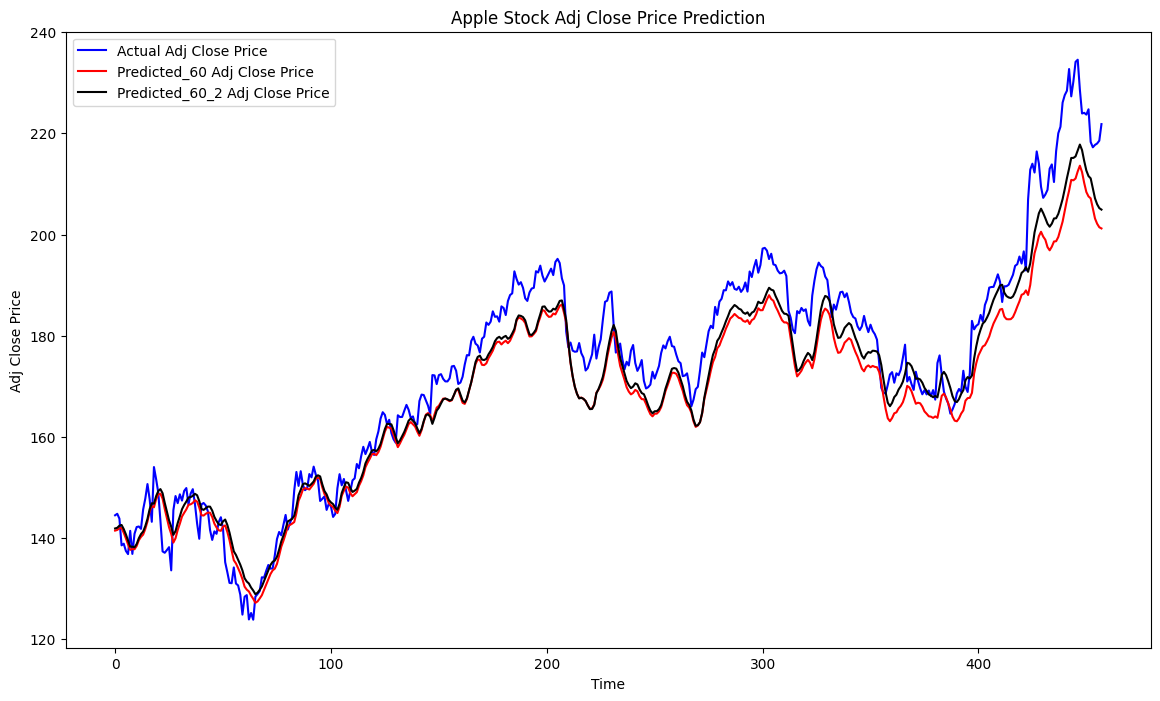

模型1的準確率: look back = 60: 6.470140783530687
模型1的準確率:look back = 5: 13.908043603857546
模型2的準確率: look back = 60: 5.260696635153679


In [ ]:
# 繪製實際與預測的 Adj Close 價格
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(actual_adj_close, color='blue', label='Actual Adj Close Price')
plt.plot(predicted_adj_close, color='red', label='Predicted_60 Adj Close Price')
# plt.plot(predicted_5_adj_close, color='green', label='Predicted_5 Adj Close Price')
plt.plot(predicted_adj_close2, color='black', label='Predicted_60_2 Adj Close Price')
plt.title('Apple Stock Adj Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

def calculate_accuracy(predicted_adj_close, actual_adj_close):
    n = len(actual_adj_close)  # 样本数量
    accuracy = np.sum(np.abs(predicted_adj_close - actual_adj_close)) / n
    return accuracy

accuracy_60 = calculate_accuracy(predicted_adj_close, actual_adj_close)
# accuracy_5 = calculate_accuracy(predicted_5_adj_close, actual_adj_close)
accuracy_2_60 = calculate_accuracy(predicted_adj_close2, actual_adj_close)
print(f"模型1的準確率: look back = 60: {accuracy_60}")
# print(f"模型1的準確率:look back = 5: {accuracy_5}")
print(f"模型2的準確率: look back = 60: {accuracy_2_60}")

# train_loss_60 = history_60.history['loss']
# val_loss_60 = history_60.history['val_loss']
# train2_loss_60 = history2_60.history['loss']
# val2_loss_60 = history2_60.history['val_loss']
# train_loss_5 = history_5.history['loss']
# val_loss_5 = history_5.history['val_loss']
# print(f"模型1的train_loss: look back = 60: {train_loss_60}")
# print(f"模型1的val_loss:look back = 60: {val_loss_60}")
# print(f"模型2的train_loss: look back = 60: {train2_loss_60}")
# print(f"模型2的val_loss:look back = 60: {val2_loss_60}")
# print(f"模型1的train_loss: look back = 5: {train_loss_5}")
# print(f"模型1的val_loss:look back = 5: {val_loss_5}")

不同look_back比較

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0313
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.5973e-04
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6073e-04
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8387e-04
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.4416e-04
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3045e-04
Epoch 13/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8178e-04
Epoch 14/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3461e-04
Epoch 15/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0255
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.5289e-04
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.1035e-04
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.8387e-04
Epoch 13/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.9873e-04
Epoch 14/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.5630e-04
Epoch 15/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0287
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0025
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0019
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0020
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0014
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0011
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.7501e-04
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.3596e-04
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.4138e-04
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.6994e-04
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.2057e-04
Epoch 13/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.8238e-04
Epoch 14/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 7.6333e-04
Epoch 15/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0265
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0029
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0020
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0017
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0012
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0012
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0011
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 9.2630e-04
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 9.4751e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 7.7337e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 7.8037e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 7.7853e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 7.9899e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 7.2558e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0358
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0027
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0020
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0018
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0014
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 0.0015
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0014
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 0.0011
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0011
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0014
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 9.4033e-04
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 0.0013
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 8.9173e-04
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 7.7013e-04
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/st

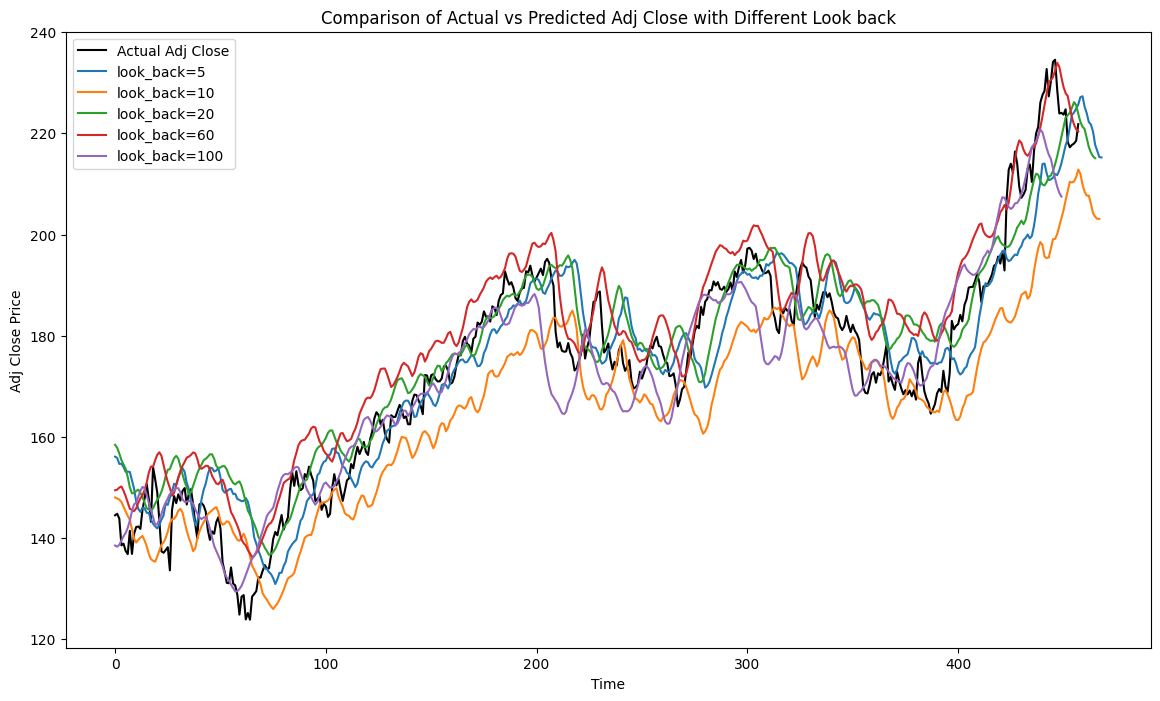

In [ ]:
look_back_array = [5,10,20,60,100]
# 用於保存結果的字典
results = {}

for look_backs in look_back_array:
  X, Y = create_dataset(sc2_data, look_backs)
  train_size = int(len(X) * 0.8)
  Xtrain, Xtest = X[:train_size], X[train_size:]
  Ytrain, Ytest = Y[:train_size], Y[train_size:]

  model = Sequential()
  model.add(LSTM(units=50, return_sequences = True, input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50))
  model.add(Dropout(0.2))
  model.add(Dense(units=25))
  model.add(Dense(units=1))

  model.compile(optimizer='adam', loss='MSE')
  model.fit(Xtrain, Ytrain, batch_size=32, epochs=50)

  predictions = model.predict(Xtest)
  Xtest_features = Xtest[:, -1, :]
  predicted_full_data = np.hstack((Xtest_features, predictions))

  predicted_full_data = sc2.inverse_transform(predicted_full_data)
  predicted_adj_close = predicted_full_data[:,-1]
  key = f"look_back={look_backs}"
  results[key] = predicted_adj_close

# 繪製結果比較圖
plt.figure(figsize=(14, 8))
plt.plot(actual_adj_close, color='black', label='Actual Adj Close')

# 遍歷結果並繪製
for key, predictions in results.items():
    plt.plot(predictions, label=key)

plt.title('Comparison of Actual vs Predicted Adj Close with Different Look back')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

Use apple stock 2 抓取超參數範圍

units=50_dropout_rate=0.2_batch_size=32_epochs=50
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0159
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0025
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0020
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0016
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0012
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0012
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0010
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 9.3061e-04
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 9.1407e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 8.1226e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 8.0353e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 8.8447e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 8.7195e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0011
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - los

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0377
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0033
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0024
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0023
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0016
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0015
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0015
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0012
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0014
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0013
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 8.6208e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0010
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 8.7337e-04
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 9.3672e-04
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 8.7189e-

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0236
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0023
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0020
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0012
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0014
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.0012
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0010
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0012
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 9.2994e-04
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 9.5661e-04
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 8.4840e-04
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 9.6244e-04
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 8.2343e-04
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 6.9498e-04
Epoch 15/100
58/58 ━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0262
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0034
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0024
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0016
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0014
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0013
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0014
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0018
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0011
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0011
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 9.6770e-04
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 8.7649e-04
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 9.8628e-04
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 8.8328e-04
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0177
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0055
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0035
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0029
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0023
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0025
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0022
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0021
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0019
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0025
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0016
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0019
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0020
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0020
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0016
Epoch 16/50
58/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0626
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0098
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0059
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0055
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0040
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0032
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0031
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0029
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0026
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0029
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0026
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0022
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0022
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0022
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0018
Epoch 16/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0298
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0056
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0042
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0035
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0029
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0025
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0022
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0020
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0019
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0019
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0020
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0018
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0016
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0020
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0396
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0070
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0052
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0040
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0033
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0029
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0026
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0021
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0025
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0022
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0022
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0023
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0018
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0019
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0017

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0220
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0018
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0013
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 9.6706e-04
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 9.7197e-04
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0011
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 8.0059e-04
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 6.7290e-04
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 7.2067e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 7.9219e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 6.8165e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 5.3116e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 7.0236e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 5.9592e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - loss: 0.0238
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 0.0022
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - loss: 0.0014
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 0.0011
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - loss: 0.0011
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - loss: 9.8523e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - loss: 8.2137e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - loss: 8.3019e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 8.9250e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - loss: 7.8333e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - loss: 6.1452e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - loss: 7.0147e-04
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - loss: 9.0589e-04
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 7.0658e-04
Epoch 15/50
29/29 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.0214
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0015
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 0.0011
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 8.5792e-04
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 9.3262e-04
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 7.0365e-04
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 8.0666e-04
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 7.0861e-04
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 7.1896e-04
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 6.7425e-04
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 8.6721e-04
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 4.7723e-04
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 5.4198e-04
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 5.2543e-04
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - loss: 0.0337
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 0.0027
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - loss: 0.0013
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 222ms/step - loss: 0.0013
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 255ms/step - loss: 9.1084e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 0.0011
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - loss: 8.2363e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - loss: 8.5012e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 9.2743e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - loss: 6.7988e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 7.0036e-04
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - loss: 6.5760e-04
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - loss: 7.0981e-04
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - loss: 7.2970e-04
Epoch 15/100

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0284
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0041
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 0.0024
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0018
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0022
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.0022
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0018
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0014
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.0014
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0019
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0013
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0014
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0012
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0013
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0012
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0668
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - loss: 0.0056
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 0.0046
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - loss: 0.0034
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 0.0031
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 0.0023
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - loss: 0.0022
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - loss: 0.0021
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 0.0021
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 248ms/step - loss: 0.0019
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - loss: 0.0018
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - loss: 0.0017
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - loss: 0.0016
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - loss: 0.0015
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 0.0227
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0031
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0027
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 0.0023
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 0.0017
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 0.0018
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0015
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 0.0014
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0014
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0012
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0013
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0012
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0012
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 0.0010
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - loss: 0.0409
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 0.0036
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - loss: 0.0030
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - loss: 0.0029
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - loss: 0.0023
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 0.0018
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - loss: 0.0020
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - loss: 0.0018
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - loss: 0.0020
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - loss: 0.0018
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 0.0017
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - loss: 0.0014
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - loss: 0.0012
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - loss: 0.0011
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/st

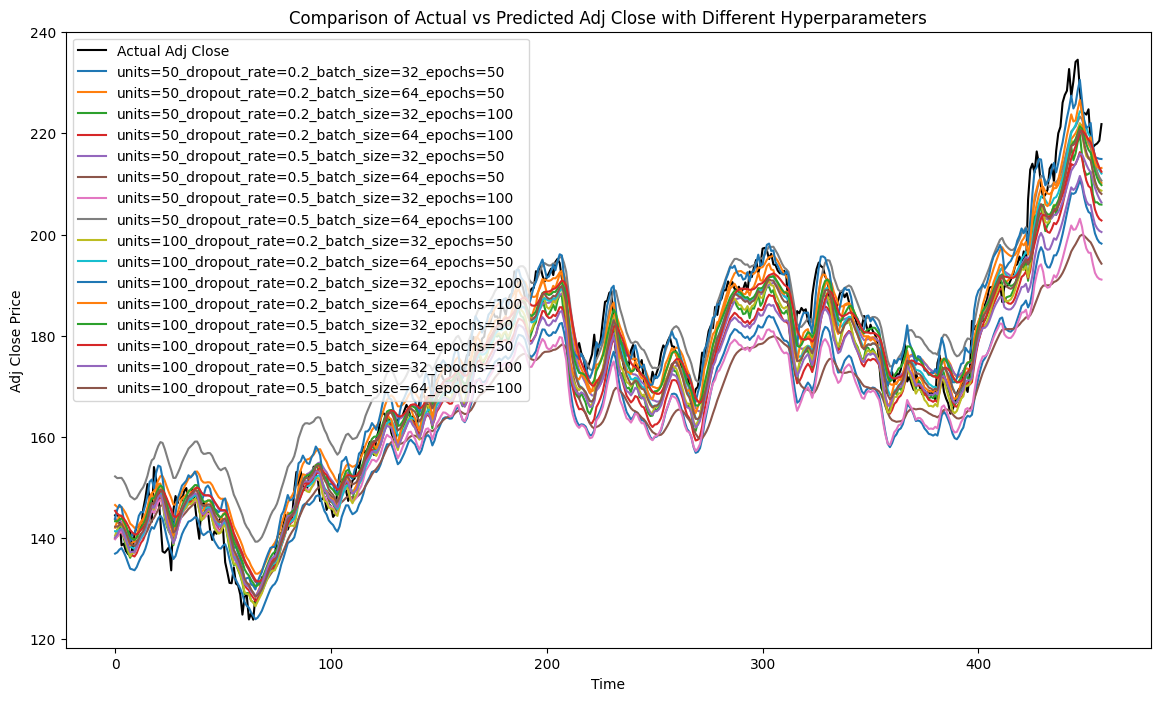

In [ ]:
#選擇look back
look_back = 60

X, Y = create_dataset(sc2_data, look_back)
train_size = int(len(X) * 0.8)
Xtrain, Xtest = X[:train_size], X[train_size:]
Ytrain, Ytest = Y[:train_size], Y[train_size:]

# 定義超參數範圍
units_options = [50, 100]
dropout_options = [0.2, 0.5]
epochs_options = [50, 100]
# epochs_options = 50
batch_size_options = [32, 64]

results = {}
loss_dict = {}

def build_lstm_model(units, dropout_rate, batch_size, epochs):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=25))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='MSE')
    history = model.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose=1)
    predictions = model.predict(Xtest)

    Xtest_features = Xtest[:, -1, :]
    predicted_full_data = np.hstack((Xtest_features, predictions))
    predicted_full_data = sc2.inverse_transform(predicted_full_data)
    predicted_adj_close = predicted_full_data[:, -1]
    final_loss = history.history['loss'][-1]

    return predicted_adj_close, final_loss

# 遍历所有超参数组合
for units in units_options:
    for dropout_rate in dropout_options:
        for epochs in epochs_options:
            for batch_size in batch_size_options:
              print(f"units={units}_dropout_rate={dropout_rate}_batch_size={batch_size}_epochs={epochs}")
              # 构建和训练模型
              predictions, final_loss = build_lstm_model(units, dropout_rate, batch_size, epochs)

              # 保存結果
              key = f"units={units}_dropout_rate={dropout_rate}_batch_size={batch_size}_epochs={epochs}"
              results[key] = predictions
              loss_dict[key] = final_loss

# 找到最小loss的key
min_loss_key = min(loss_dict, key=loss_dict.get)
min_loss_value = loss_dict[min_loss_key]

print(f"Lowest Loss: {min_loss_value:.6f} with parameters: {min_loss_key}")

# 繪製結果比較圖
plt.figure(figsize=(14, 8))
plt.plot(actual_adj_close, color='black', label='Actual Adj Close')

# 遍歷結果並繪製
for key, predictions in results.items():
    plt.plot(predictions, label=key)

plt.title('Comparison of Actual vs Predicted Adj Close with Different Hyperparameters')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


## CNN + LSTM:
先由 CNN 提取出關鍵特徵，再由 LSTM 對這些特徵進行時間序列分析。這種多層次的信息融合使得模型能夠更全面地理解數據，從而提高預測的準確性。


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0176
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0021
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0013
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0012
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0013
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0011
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0011
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0011
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0010
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0011
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 9.2546e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 7.8802e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 8.9933e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 9.5460e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0213
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0024
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0016
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0016
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0012
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.5780e-04
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.1967e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 8.6029e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.0200e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.7338e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

NameError: name 'results' is not defined

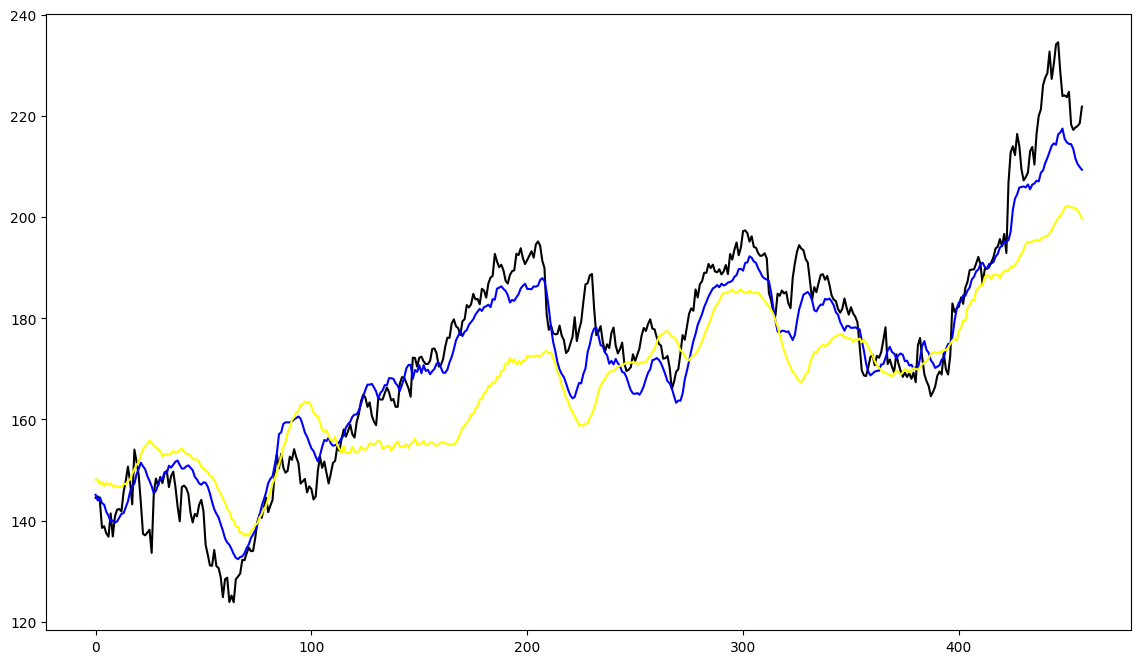

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

#選擇look back
look_back = 60

X, Y = create_dataset(sc2_data, look_back)
train_size = int(len(X) * 0.8)
Xtrain, Xtest = X[:train_size], X[train_size:]
Ytrain, Ytest = Y[:train_size], Y[train_size:]

key = f"units={100}_dropout_rate={0.2}_batch_size={32}_epochs={100}"

#model CNNLSTM 1 layer
model_CNNLSTM = Sequential()
model_CNNLSTM.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model_CNNLSTM.add(MaxPooling1D(pool_size=2))

model_CNNLSTM.add(LSTM(units=50, return_sequences = True))
model_CNNLSTM.add(Dropout(0.2))
model_CNNLSTM.add(LSTM(units=50))
model_CNNLSTM.add(Dropout(0.2))
model_CNNLSTM.add(Dense(units=25))
model_CNNLSTM.add(Dense(units=1))

model_CNNLSTM.compile(optimizer = 'adam', loss='MSE')
model_CNNLSTM.fit(Xtrain,Ytrain,batch_size=32, epochs=50)
perdictions_CNNLSTM = model_CNNLSTM.predict(Xtest)
Xtest_feature = Xtest[:,-1,:]
predicted_CNNLSTM_full_data = np.hstack((Xtest_feature,perdictions_CNNLSTM))
actual_full_data = np.hstack((Xtest_feature, Y_test.reshape(-1, 1)))
predicted_CNNLSTM_full_data = sc2.inverse_transform(predicted_CNNLSTM_full_data)
actual_full_data = sc2.inverse_transform(actual_full_data)
predicted_CNNLSTM_adj_close = predicted_CNNLSTM_full_data[:,-1]
actual_adj_close = actual_full_data[:,-1]

#model CNNLSTM 2 layer
model_CNNLSTM_2 = Sequential()
model_CNNLSTM_2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model_CNNLSTM_2.add(MaxPooling1D(pool_size=2))
model_CNNLSTM_2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_CNNLSTM_2.add(MaxPooling1D(pool_size=2))

model_CNNLSTM_2.add(LSTM(units=50, return_sequences = True))
model_CNNLSTM_2.add(Dropout(0.2))
model_CNNLSTM_2.add(LSTM(units=50))
model_CNNLSTM_2.add(Dropout(0.2))
model_CNNLSTM_2.add(Dense(units=25))
model_CNNLSTM_2.add(Dense(units=1))

model_CNNLSTM_2.compile(optimizer = 'adam', loss='MSE')
model_CNNLSTM_2.fit(Xtrain,Ytrain,batch_size=32, epochs=50)
perdictions_CNNLSTM_2 = model_CNNLSTM_2.predict(Xtest)
Xtest_feature = Xtest[:,-1,:]
predicted_CNNLSTM_full_data_2 = np.hstack((Xtest_feature,perdictions_CNNLSTM_2))
predicted_CNNLSTM_full_data_2 = sc2.inverse_transform(predicted_CNNLSTM_full_data_2)
predicted_CNNLSTM_adj_close_2 = predicted_CNNLSTM_full_data_2[:,-1]

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.plot(actual_adj_close, color='black', label='Actual Adj Close Price')
plt.plot(predicted_CNNLSTM_adj_close, color='blue', label='Predicted_CNNLSTM Adj Close Price')
plt.plot(predicted_CNNLSTM_adj_close_2, color='yellow', label='Predicted_CNNLSTM_2 Adj Close Price')

predictions = results[key]
plt.plot(predictions, color='red', label="Predicted_LSTM Adj Close Price")

plt.title('Apple Stock Adj Close Price Prediction LSTM model vs CNN+LSTM')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


兩層的CNN應該是因為過度擬合導致精準度下降，比較CNN超參數

filter=32,Kernel_size=3,pool_size=2
Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0224
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0022
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0016
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0013
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0014
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0011
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0011
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0011
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0010
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 9.7041e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 8.3329e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 8.0583e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 7.2592e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 8.1196e-04
Epoch 15/50
58/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0259
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0024
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0021
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0016
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0015
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0013
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0010
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0010
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.0266e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0011
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 9.1460e-04
Epoch 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0261
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0027
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0025
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0017
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0017
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0015
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0011
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0010
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 9.7528e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0011
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0012
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 7.0222e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0011
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0015
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 8.8105e-04
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0191
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0022
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0023
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0016
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0016
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0013
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0013
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0019
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0010
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0011
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 9.3267e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.5153e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.1225e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.9435e-04

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0279
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0021
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0014
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0017
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0015
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0012
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0010
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0012
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0012
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 9.5384e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 9.5151e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 8.8290e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 8.7605e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 8.5888e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0132
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0022
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0018
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0015
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0013
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 9.0792e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.6646e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.5792e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.9317e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.7108

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0260
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0022
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0021
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0016
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0015
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0013
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0014
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0011
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 9.6595e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 8.5098e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0011
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 8.8837e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 8.3594e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 9.7727e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 7.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0209
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0029
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0020
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0016
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0016
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0015
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0013
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0010
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0010
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.1625e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.2034e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 8.9035e-04
Epo

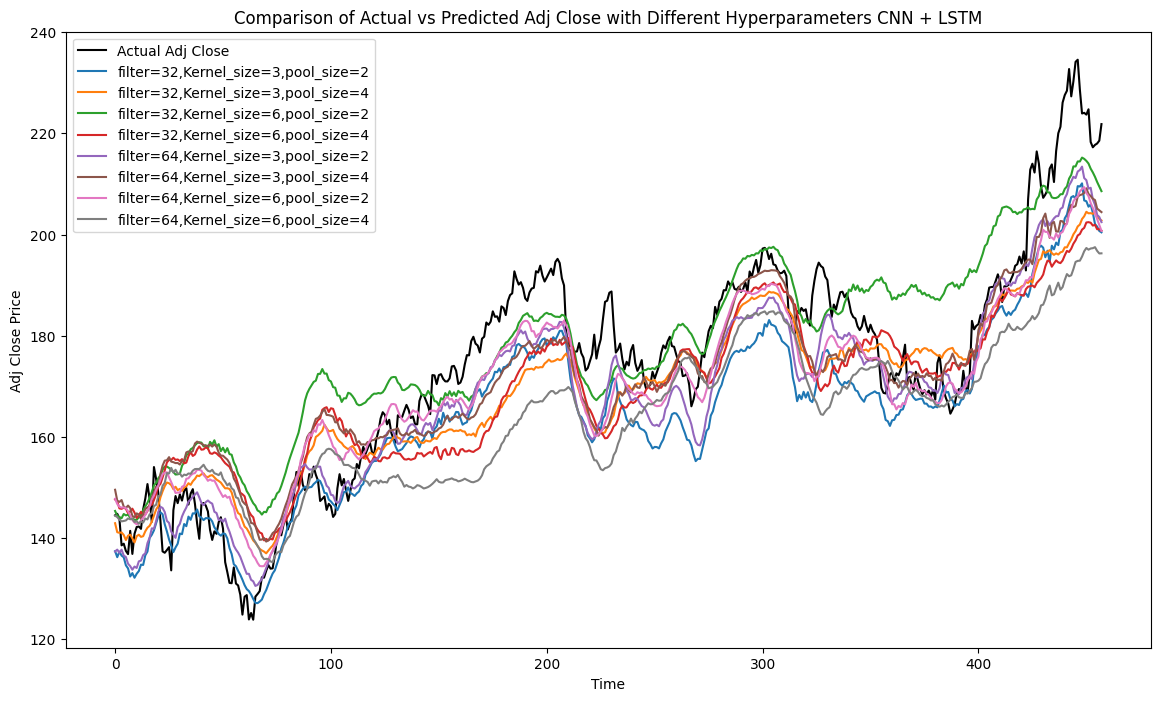

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

#選擇look back
look_back = 60

X, Y = create_dataset(sc2_data, look_back)
train_size = int(len(X) * 0.8)
Xtrain, Xtest = X[:train_size], X[train_size:]
Ytrain, Ytest = Y[:train_size], Y[train_size:]

result = {}
loss_dict_CNNLSTM = {}
key = ''

filters = [32,64]
Kernel_sizes = [3,6]
pool_sizes = [2,4]

def build_cnnlstm_model(filters, kernel_sizes, pool_sizes):
  model = Sequential()
  model.add(Conv1D(filters=filters, kernel_size = kernel_sizes, activation='relu', input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
  model.add(MaxPooling1D(pool_size=pool_sizes))

  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50))
  model.add(Dropout(0.2))
  model.add(Dense(units=25))
  model.add(Dense(units=1))

  model.compile(optimizer = 'adam', loss='MSE')
  history = model.fit(Xtrain,Ytrain,batch_size=32, epochs=50)
  perdictions = model.predict(Xtest)
  Xtest_feature = Xtest[:,-1,:]
  predicted_full_data = np.hstack((Xtest_feature,perdictions))
  predicted_full_data = sc2.inverse_transform(predicted_full_data)
  predicted_adj_close = predicted_full_data[:,-1]
  final_loss = history.history['loss'][-1] # 獲取最後的loss

  return predicted_adj_close, final_loss

for filter in filters:
  for Kernel_size in Kernel_sizes:
    for pool_size in pool_sizes:
      print(f"filter={filter},Kernel_size={Kernel_size},pool_size={pool_size}")
      predicted_adj_close, final_loss = build_cnnlstm_model(filter,Kernel_size,pool_size)
      key = f"filter={filter},Kernel_size={Kernel_size},pool_size={pool_size}"
      result[key]=predicted_adj_close
      loss_dict_CNNLSTM[key] = final_loss

# 找到最小loss的key
min_loss_key = min(loss_dict_CNNLSTM, key=loss_dict_CNNLSTM.get)
min_loss_value = loss_dict_CNNLSTM[min_loss_key]

print(f"Lowest Loss CNNLSTM: {min_loss_value:.6f} with parameters: {min_loss_key}")

# 繪製結果比較圖
plt.figure(figsize=(14, 8))
plt.plot(actual_adj_close, color='black', label='Actual Adj Close')

# 遍歷結果並繪製
for key, predictions in result.items():
    plt.plot(predictions, label=key)

plt.title('Comparison of Actual vs Predicted Adj Close with Different Hyperparameters CNN + LSTM')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

篩選依照上面CNN超參數後，尋找LSTM超參數

units=50_dropout_rate=0.2_batch_size=32_epochs=50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0237
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0023
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0022
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0014
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0014
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0016
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0013
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0013
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0013
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.3624e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 9.4890e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.6635e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.8566e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0398
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0036
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0023
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0024
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0022
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0016
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0013
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011
Epoch 16/50
29/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0314
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0024
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0020
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0017
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0014
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0013
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0012
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0011
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0010
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 9.4504e-04
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.4869e-04
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.7534e-04
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0582
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0039
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0026
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0020
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0017
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0014
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0014
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0013
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0013
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0013
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0013
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0275
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0039
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0028
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0026
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0026
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0023
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0019
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0020
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0021
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0022
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0021
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0020
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0020
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0377
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0081
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0046
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0034
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0034
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0033
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0025
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0026
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0026
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0021
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0022
Epoch 16/50
29/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0366
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0045
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0043
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0032
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0029
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0026
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0023
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0023
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0020
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0022
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0023
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0021
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0020
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0020
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0020
E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0371
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0074
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0052
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0044
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0033
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0030
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0026
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0026
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0023
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0024
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0023
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0024
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0024
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0019
E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0188
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0014
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0015
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0011
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0011
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 8.9179e-04
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 9.3189e-04
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 9.7505e-04
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 8.1220e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 9.4011e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 7.1530e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 9.9505e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 6.4475e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 6.1585e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0347
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0021
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0015
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0015
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 9.5171e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0013
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0010
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0011
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 9.8099e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 9.8125e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 8.9866e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 8.4647e-04
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 8.5728e-04
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.5571e-04
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0165
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0020
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0014
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0017
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0013
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0011
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 9.8040e-04
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 9.5607e-04
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 9.6670e-04
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 8.1277e-04
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 7.4139e-04
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 7.9401e-04
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 7.7778e-04
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 9.0813e-04
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0319
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0020
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0016
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0012
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0014
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 9.5515e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0011
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 8.8726e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 8.5732e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 8.2402e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 8.6469e-04
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 8.4860e-04
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 7.3396e-04
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 6.4296e-04
Epoch 15/100
29/29 ━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0389
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0039
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0029
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0027
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0020
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0018
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0020
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0015
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0017
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0016
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0015
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0012
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0013
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0015
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0014
Epoch 16/50
58/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0366
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0048
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0028
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0033
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0026
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0020
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0021
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0021
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0018
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0014
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0018
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0013
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0015
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0016
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0014
Epoch 16/50
29/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0261
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0036
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0024
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0020
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0020
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0017
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0017
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0019
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0017
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0015
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0013
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0015
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0014
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0015
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0014
E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0344
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0052
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0040
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0037
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0029
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0022
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0020
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0021
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0018
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0017
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0020
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0018
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0013
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0014
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0014
E

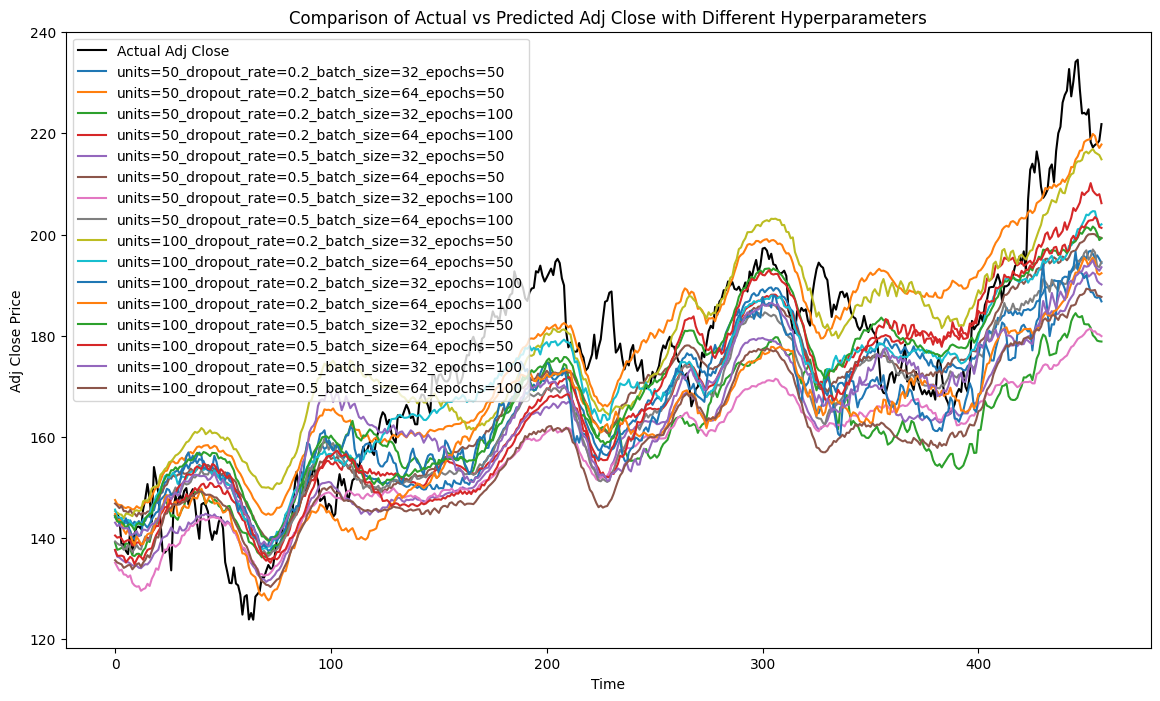

In [ ]:
#選擇look back
look_back = 60

X, Y = create_dataset(sc2_data, look_back)
train_size = int(len(X) * 0.8)
Xtrain, Xtest = X[:train_size], X[train_size:]
Ytrain, Ytest = Y[:train_size], Y[train_size:]

# 定義超參數範圍
units_options = [50, 100]
dropout_options = [0.2, 0.5]
epochs_options = [50, 100]
# epochs_options = 50
batch_size_options = [32, 64]

results = {}
loss_dict = {}

def build_lstm_model(units, dropout_rate, batch_size, epochs):
    model = Sequential()

    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size = 3, activation='relu', input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
    model.add(MaxPooling1D(pool_size=4))

    model.add(LSTM(units=units, return_sequences=True, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=25))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='MSE')
    history = model.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose=1)
    predictions = model.predict(Xtest)

    Xtest_features = Xtest[:, -1, :]
    predicted_full_data = np.hstack((Xtest_features, predictions))
    predicted_full_data = sc2.inverse_transform(predicted_full_data)
    predicted_adj_close = predicted_full_data[:, -1]
    final_loss = history.history['loss'][-1]

    return predicted_adj_close, final_loss

# 遍历所有超参数组合
for units in units_options:
    for dropout_rate in dropout_options:
        for epochs in epochs_options:
            for batch_size in batch_size_options:
              print(f"units={units}_dropout_rate={dropout_rate}_batch_size={batch_size}_epochs={epochs}")
              # 构建和训练模型
              predictions, final_loss = build_lstm_model(units, dropout_rate, batch_size, epochs)

              # 保存結果
              key = f"units={units}_dropout_rate={dropout_rate}_batch_size={batch_size}_epochs={epochs}"
              results[key] = predictions
              loss_dict[key] = final_loss

# 找到最小loss的key
min_loss_key = min(loss_dict, key=loss_dict.get)
min_loss_value = loss_dict[min_loss_key]

print(f"Lowest Loss: {min_loss_value:.6f} with parameters: {min_loss_key}")

# 繪製結果比較圖
plt.figure(figsize=(14, 8))
plt.plot(actual_adj_close, color='black', label='Actual Adj Close')

# 遍歷結果並繪製
for key, predictions in results.items():
    plt.plot(predictions, label=key)

plt.title('Comparison of Actual vs Predicted Adj Close with Different Hyperparameters')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

跟以上相同但加入EarlyStopping

units=50_dropout_rate=0.2_batch_size=32_epochs=50
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0288
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0029
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0020
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0022
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0015
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0013
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0015
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.8587e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.4151e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.0820e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.2847e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.5950

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0353
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0031
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0022
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0023
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0016
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0014
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0016
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0014
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0013
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011
Epoch 16/50
29/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0271
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0031
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0021
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0018
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0015
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0014
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0017
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0017
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.4920e-04
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.3025e-04
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0011
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.3780e-04
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0497
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0049
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0026
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0021
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0016
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0014
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0013
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0011
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0010
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0010
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.6761e-04
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.70

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0269
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0054
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0038
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0036
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0026
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0027
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0024
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0023
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0022
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0022
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0016
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0019
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0016
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0017
Epoch 16/50
58/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0422
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0055
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0053
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0040
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0034
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0029
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0027
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0023
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0025
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0019
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0022
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0022
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0021
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0018
Epoch 16/50
29/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0222
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0044
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0040
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0034
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0027
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0024
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0021
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0024
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0025
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0022
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0018
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0019
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0021
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0020
E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0470
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0073
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0048
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0048
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0033
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0031
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0028
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0026
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0026
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0023
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0022
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0022
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0023
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0020
E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0116
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0016
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0017
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0013
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0014
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0014
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 9.4970e-04
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0010
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 7.1972e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 9.3579e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 8.8616e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.6839e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 7.6218e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.9724e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0389
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0032
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0017
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0015
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0014
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0012
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0012
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0013
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0011
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0011
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 8.9997e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 8.3544e-04
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 8.4467e-04
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 9.0377e-04
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0189
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0022
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0015
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0017
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0012
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0012
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0011
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0011
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 9.6867e-04
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 7.1036e-04
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 8.3061e-04
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 9.6360e-04
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 8.1624e-04
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0010
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0413
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0033
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0017
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0014
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0012
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0011
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0011
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 9.9719e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 9.9846e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 9.1562e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 8.8254e-04
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 9.4527e-04
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 8.0607e-04
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 8.2071e-04
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0298
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0034
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0026
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0021
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0018
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0018
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0017
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0017
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0016
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0017
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0013
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0012
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0015
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0014
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0013
Epoch 16/50
58/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0436
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0056
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0029
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0026
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0021
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0020
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0019
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0017
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0018
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0020
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0017
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0015
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0015
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0014
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0013
Epoch 16/50
29

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0214
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0038
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0028
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0023
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0021
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0015
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0019
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0022
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0014
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0020
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0013
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0013
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0018
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0013
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0013
E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0435
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0062
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0037
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0028
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0032
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0025
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0023
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0019
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0023
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0019
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0019
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0018
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0014
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0016
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0012
E

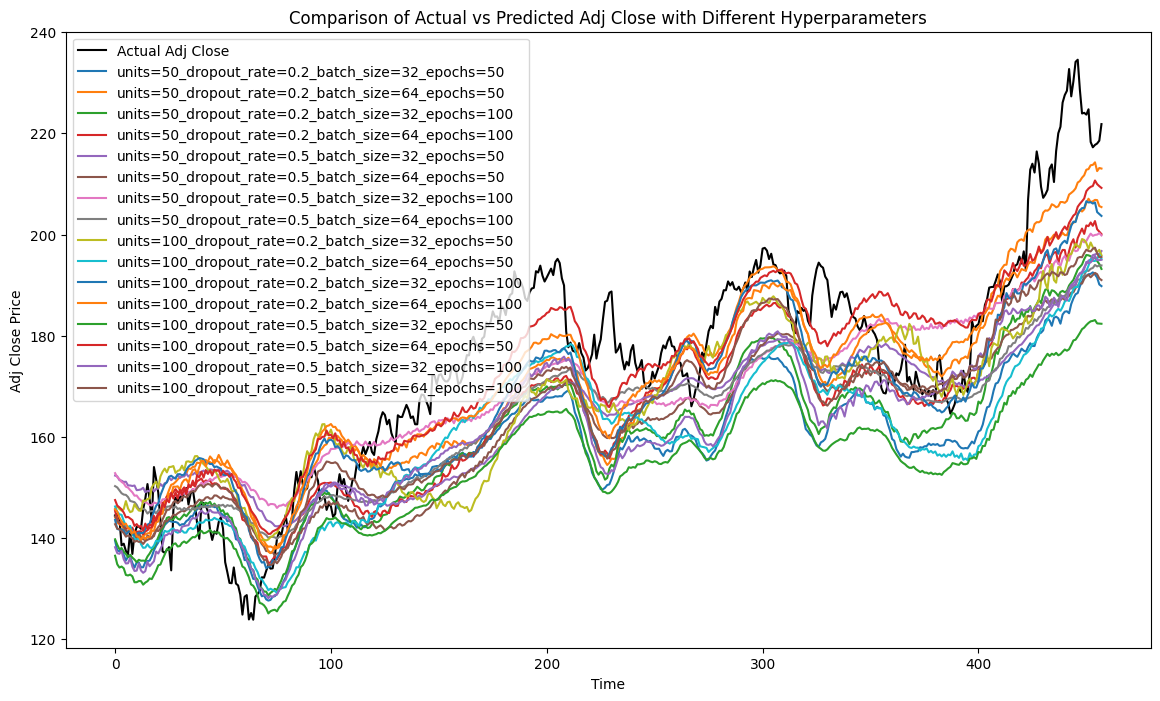

In [ ]:
from keras.callbacks import EarlyStopping

# 選擇look back
look_back = 60

X, Y = create_dataset(sc2_data, look_back)
train_size = int(len(X) * 0.8)
Xtrain, Xtest = X[:train_size], X[train_size:]
Ytrain, Ytest = Y[:train_size], Y[train_size:]

# 定義超參數範圍
units_options = [50, 100]
dropout_options = [0.2, 0.5]
epochs_options = [50, 100]
batch_size_options = [32, 64]

results = {}
loss_dict = {}

def build_lstm_model(units, dropout_rate, batch_size, epochs):
    model = Sequential()

    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
    model.add(MaxPooling1D(pool_size=4))

    model.add(LSTM(units=units, return_sequences=True, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=25))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='MSE')

    # 定義EarlyStopping回調函數
    early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

    history = model.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[early_stopping])
    predictions = model.predict(Xtest)

    Xtest_features = Xtest[:, -1, :]
    predicted_full_data = np.hstack((Xtest_features, predictions))
    predicted_full_data = sc2.inverse_transform(predicted_full_data)
    predicted_adj_close = predicted_full_data[:, -1]
    final_loss = history.history['loss'][-1]

    return predicted_adj_close, final_loss

# 遍历所有超参数组合
for units in units_options:
    for dropout_rate in dropout_options:
        for epochs in epochs_options:
            for batch_size in batch_size_options:
                print(f"units={units}_dropout_rate={dropout_rate}_batch_size={batch_size}_epochs={epochs}")
                # 构建和训练模型
                predictions, final_loss = build_lstm_model(units, dropout_rate, batch_size, epochs)

                # 保存結果
                key = f"units={units}_dropout_rate={dropout_rate}_batch_size={batch_size}_epochs={epochs}"
                results[key] = predictions
                loss_dict[key] = final_loss

# 找到最小loss的key
min_loss_key = min(loss_dict, key=loss_dict.get)
min_loss_value = loss_dict[min_loss_key]

print(f"Lowest Loss: {min_loss_value:.6f} with parameters: {min_loss_key}")

# 繪製結果比較圖
plt.figure(figsize=(14, 8))
plt.plot(actual_adj_close, color='black', label='Actual Adj Close')

# 遍歷結果並繪製
for key, predictions in results.items():
    plt.plot(predictions, label=key)

plt.title('Comparison of Actual vs Predicted Adj Close with Different Hyperparameters')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

pooling size = 2

units=50_dropout_rate=0.2_batch_size=32_epochs=50
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0271
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0026
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0019
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0013
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0019
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0015
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0011
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0014
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0012
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 7.5920e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 9.2291e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 8.0619e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 7.1876e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 7.9107e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 6.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0445
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0034
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0022
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0020
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0015
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0016
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0014
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0013
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0012
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0013
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0014
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0011
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0010
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0010
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 9.3844e-04
Epoch 16/50

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0091
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0021
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0015
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0014
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0013
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0011
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0010
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 9.4741e-04
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0010
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 9.0892e-04
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 8.4064e-04
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 8.3105e-04
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 8.8271e-04
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 8.6329e-04
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0194
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0027
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0022
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0015
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0014
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0012
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0014
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0012
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0011
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 9.7185e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0010
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0012
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 9.5486e-04
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 9.3270e-04
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0424
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0042
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0039
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0026
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0023
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0019
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0020
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0021
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0018
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0021
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0022
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0021
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0021
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0019
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0017
Epoch 16/50
58/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0471
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0079
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0056
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0041
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0033
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0034
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0028
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0028
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0025
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0022
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0021
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0020
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0023
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0021
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0019
Epoch 16/50
29/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0252
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0043
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0033
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0022
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0026
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0026
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0020
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0019
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0017
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0022
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0018
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0017
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0018
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0017
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0017
E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0834
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0080
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0051
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0039
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0036
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0032
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0030
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0028
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0027
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0023
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0021
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0023
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0030
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0022
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0022
E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.0251
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0013
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 9.1582e-04
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0012
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 8.7319e-04
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 8.0485e-04
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0013
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 7.7635e-04
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 7.5475e-04
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.7155e-04
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.1154e-04
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 5.9616e-04
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 6.0729e-04
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 4.8265e-04
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0177
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0016
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0012
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0011
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0011
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 8.4796e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 8.5635e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 9.1100e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 8.1596e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - loss: 7.3332e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 6.6643e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 8.7152e-04
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 6.4141e-04
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 5.4681e-04
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0215
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0015
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0011
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0010
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0011
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 9.4740e-04
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 7.8469e-04
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 7.1941e-04
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 7.1580e-04
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 6.6468e-04
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 7.4226e-04
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 8.5477e-04
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 6.7153e-04
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 6.1525e-04
Epoch 15/100
58/58 ━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0220
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 0.0023
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0016
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0014
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.0010
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0010
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0010
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 7.1548e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 8.8189e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 7.0173e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 8.2207e-04
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 6.7296e-04
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 5.6251e-04
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - loss: 5.9102e-04
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0388
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0040
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0026
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0023
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0019
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0017
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0016
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0014
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0016
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0015
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0014
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0012
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0015
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0013
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0013
Epoch 16/50
58/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0239
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0041
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0032
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0023
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.0018
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0019
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0017
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0017
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0015
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0015
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.0014
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 0.0014
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0013
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 0.0012
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 0.0012
Epoch 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0279
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0033
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0031
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0020
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0022
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0017
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0018
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0017
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0017
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0013
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0013
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0014
Epoch 13/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0014
Epoch 14/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0013
Epoch 15/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0347
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0046
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0031
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0027
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0023
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0021
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0021
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0018
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0017
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0017
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0016
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0014
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.0013
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0016
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.00

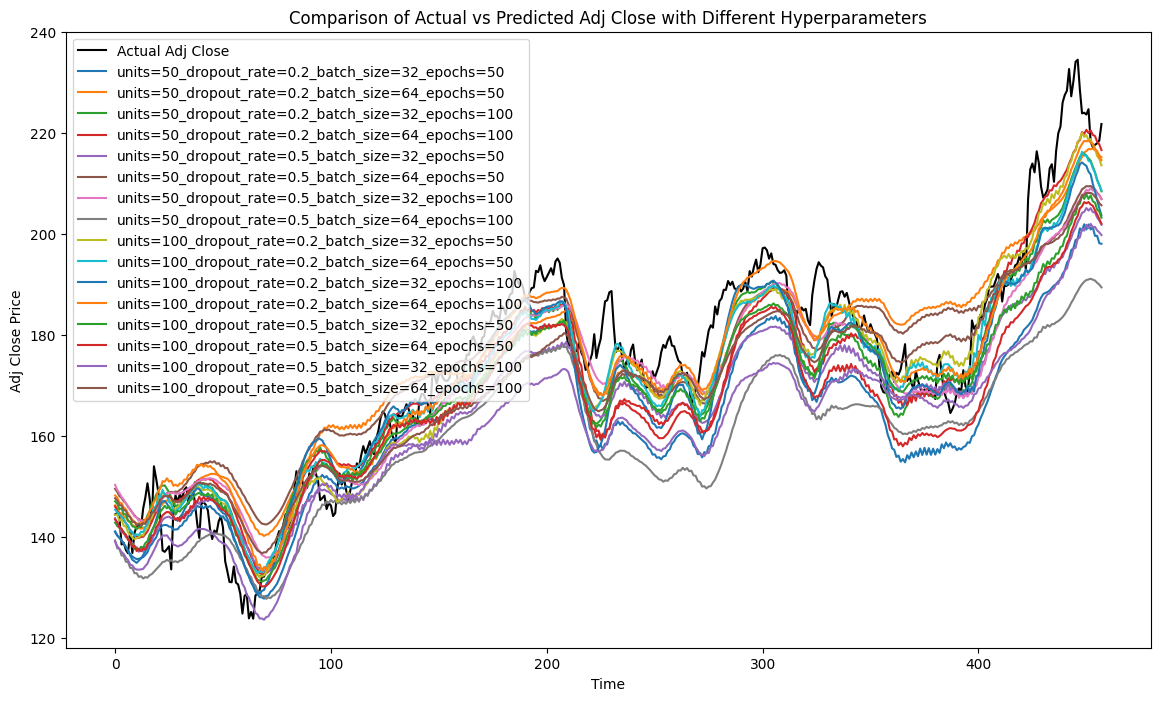

In [ ]:
from keras.callbacks import EarlyStopping

# 選擇look back
look_back = 60

X, Y = create_dataset(sc2_data, look_back)
train_size = int(len(X) * 0.8)
Xtrain, Xtest = X[:train_size], X[train_size:]
Ytrain, Ytest = Y[:train_size], Y[train_size:]

# 定義超參數範圍
units_options = [50, 100]
dropout_options = [0.2, 0.5]
epochs_options = [50, 100]
batch_size_options = [32, 64]

results = {}
loss_dict = {}

def build_lstm_model(units, dropout_rate, batch_size, epochs):
    model = Sequential()

    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
    model.add(MaxPooling1D(pool_size=2))

    model.add(LSTM(units=units, return_sequences=True, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=25))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='MSE')

    # 定義EarlyStopping回調函數
    early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

    history = model.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[early_stopping])
    predictions = model.predict(Xtest)

    Xtest_features = Xtest[:, -1, :]
    predicted_full_data = np.hstack((Xtest_features, predictions))
    predicted_full_data = sc2.inverse_transform(predicted_full_data)
    predicted_adj_close = predicted_full_data[:, -1]
    final_loss = history.history['loss'][-1]

    return predicted_adj_close, final_loss

# 遍历所有超参数组合
for units in units_options:
    for dropout_rate in dropout_options:
        for epochs in epochs_options:
            for batch_size in batch_size_options:
                print(f"units={units}_dropout_rate={dropout_rate}_batch_size={batch_size}_epochs={epochs}")
                # 构建和训练模型
                predictions, final_loss = build_lstm_model(units, dropout_rate, batch_size, epochs)

                # 保存結果
                key = f"units={units}_dropout_rate={dropout_rate}_batch_size={batch_size}_epochs={epochs}"
                results[key] = predictions
                loss_dict[key] = final_loss

# 找到最小loss的key
min_loss_key = min(loss_dict, key=loss_dict.get)
min_loss_value = loss_dict[min_loss_key]

print(f"Lowest Loss: {min_loss_value:.6f} with parameters: {min_loss_key}")

# 繪製結果比較圖
plt.figure(figsize=(14, 8))
plt.plot(actual_adj_close, color='black', label='Actual Adj Close')

# 遍歷結果並繪製
for key, predictions in results.items():
    plt.plot(predictions, label=key)

plt.title('Comparison of Actual vs Predicted Adj Close with Different Hyperparameters')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()